In [1]:
# !pip install compound-word-splitter

In [2]:
# !pip install pyenchant

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set()

In [4]:
import re
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [5]:
import splitter
from tqdm import tqdm

In [6]:
tqdm.pandas(desc="Progress")

In [7]:
STOPWORDS = stopwords.words('english')

In [8]:
data_dir = 'C:/Users/Kelvin Chumbe/Anaconda Projects/Hotel Review Mining/scrapped_reviews/scrapped_reviews/spiders/scrapped_reviews_datasets'

In [9]:
Hiltons_Bridge = pd.read_json(os.path.join(data_dir, 'Hiltons_Bridge_reviews.json'))

In [10]:
Hiltons_Bridge.head(6)

hotel  \
0  Hilton London Tower Bridge   
1  Hilton London Tower Bridge   
2  Hilton London Tower Bridge   
3  Hilton London Tower Bridge   
4  Hilton London Tower Bridge   
5  Hilton London Tower Bridge   

                                              review  \
0  Lovely staff through out the hotel particularl...   
1  Stayed with 9 year old daughter on a whistle s...   
2  Badly managed check-in process. No fresh orang...   
3  Enjoyed our stay at tower bridge hilton..staff...   
4  We had a great 4 night stay here - 2 rooms. Th...   
5  Tremendous experience. Clean hotel. Friendly s...   

                               title  rating       date  
0  Excellent oasis in troubled times      50 2020-12-01  
1      Lovely staff, great location.      50 2020-08-01  
2                       Catastrophic      10 2020-12-01  
3            Very enjoyable stay....      40 2020-10-01  
4                      Fabulous stay      50 2020-10-01  
5                   Great experience      50 2019-02-01

In [11]:
Hiltons_Bridge.shape

(4211, 5)

In [12]:
Hiltons_Euston = pd.read_json(os.path.join(data_dir, 'Hiltons_Euston_reviews.json'))

In [13]:
Hiltons_Euston.head(6)

hotel                                             review  \
0  Hilton London Euston  Travelling for work during the pandemic.  When...   
1  Hilton London Euston  I came to London for a business trip, and this...   
2  Hilton London Euston  10min walking distance from kings cross and at...   
3  Hilton London Euston  We stayed here at the beginning of September f...   
4  Hilton London Euston  Stayed for a few nights, room was ok, but then...   
5  Hilton London Euston  The hotel was fine apart from the awful bed li...   

                                              title  rating       date  
0                       Very quiet, good location.       30 2021-03-01  
1           Convenient location for a business trip      40 2020-02-01  
2             Good business hotel near kings cross       40 2020-09-01  
3  A very safe place to stay during the [Covid] war      50 2020-09-01  
4                                    Very Average        30 2019-12-01  
5                                Terrible bed linen      40 2019-07-01

In [14]:
Hiltons_Euston.shape

(2362, 5)

In [15]:
Hiltons_Gatwick = pd.read_json(os.path.join(data_dir, 'Hiltons_Gatwick_reviews.json'))

In [16]:
Hiltons_Gatwick.head(6)

hotel  \
0  Hotel Hilton London Gatwick Airport   
1  Hotel Hilton London Gatwick Airport   
2  Hotel Hilton London Gatwick Airport   
3  Hotel Hilton London Gatwick Airport   
4  Hotel Hilton London Gatwick Airport   
5  Hotel Hilton London Gatwick Airport   

                                              review  \
0  The stress of travelling and getting the test ...   
1  We got to the Hilton after a long day of trave...   
2  We booked in for the Test and Rest package and...   
3  Excellent customer service. Aymen was the best...   
4  We stayed here after landing late from the Can...   
5  I just want to say a big thank you for these h...   

                                           title  rating       date  
0                                  Test and Rest      50 2021-01-01  
1                             Airport Stay Over       50 2020-07-01  
2                             Test and Rest Stay      50 2021-01-01  
3                                       Amazing!      50 2021-01-01  
4  Family Room - Convenient but that’s about it       30 2020-01-01  
5            Unexpected booking for flight delay      50 2020-12-01

In [17]:
Hiltons_Gatwick.shape

(9782, 5)

In [18]:
Hiltons_London = pd.read_json(os.path.join(data_dir, 'Hiltons_London_reviews.json'))

In [19]:
Hiltons_London.head(6)

hotel  \
0  Hotel Hilton London Gatwick Airport   
1  Hotel Hilton London Gatwick Airport   
2  Hotel Hilton London Gatwick Airport   
3  Hotel Hilton London Gatwick Airport   
4  Hotel Hilton London Gatwick Airport   
5                 Hilton London Euston   

                                              review  \
0  The stress of travelling and getting the test ...   
1  We got to the Hilton after a long day of trave...   
2  We booked in for the Test and Rest package and...   
3  Excellent customer service. Aymen was the best...   
4  We stayed here after landing late from the Can...   
5  Travelling for work during the pandemic.  When...   

                                           title  rating       date  
0                                  Test and Rest      50 2021-01-01  
1                             Airport Stay Over       50 2020-07-01  
2                             Test and Rest Stay      50 2021-01-01  
3                                       Amazing!      50 2021-01-01  
4  Family Room - Convenient but that’s about it       30 2020-01-01  
5                    Very quiet, good location.       30 2021-03-01

In [20]:
Hiltons_London.shape

(5463, 5)

In [21]:
Hiltons_Metropole = pd.read_json(os.path.join(data_dir, 'Hiltons_Metropole_reviews.json'))

In [22]:
Hiltons_Metropole.head(6)

hotel                                             review  \
0  Hilton London Metropole  We have stayed at this hotel now on 3 occasion...   
1  Hilton London Metropole  Stayed over the weekend as a treat for my pare...   
2  Hilton London Metropole  I have read a few reviews saying the the hotel...   
3  Hilton London Metropole  We planned this visit as a surprise For our ki...   
4  Hilton London Metropole  We were very kindly upgraded - made our annive...   
5  Hilton London Metropole  Stayed here for 2 nights in a family room whil...   

                                   title  rating       date  
0                    Great relaxing stay      50 2021-02-01  
1          Halloween Treat for Mum & Dad      50 2020-10-01  
2            Good value and lovely staff      50 2020-12-01  
3  Christmas kids treat - slight issues       30 2020-12-01  
4                            Anniversary      50 2020-11-01  
5  Great location for Winter Wonderland       50 2019-12-01

In [23]:
Hiltons_Metropole.shape

(5550, 5)

In [24]:
Hiltons_WestEnd = pd.read_json(os.path.join(data_dir, 'Hiltons_WestEnd_reviews.json'))

In [25]:
Hiltons_WestEnd.head(6)

hotel  \
0  DoubleTree by Hilton Hotel London - West End   
1  DoubleTree by Hilton Hotel London - West End   
2  DoubleTree by Hilton Hotel London - West End   
3  DoubleTree by Hilton Hotel London - West End   
4  DoubleTree by Hilton Hotel London - West End   
5  DoubleTree by Hilton Hotel London - West End   

                                              review                    title  \
0  We spent a night here as we had an appointment...  Pleasant stay in London   
1  Stayed here for three nights (delayed trip fro...           Fantastic Stay   
2  Went to this hotel for our last visit to Londo...            Disappointed    
3  I had a lovely stay in this hotel. Second visi...             Weekend stay   
4  Very simply .. the staff here are amazing ... ...         Fantastic staff    
5  Arrived at the hotel approx 7.30-8pm. Staff se...  Mr Douglas James Rankin   

   rating       date  
0      30 2020-12-01  
1      50 2020-10-01  
2      30 2020-12-01  
3      40 2020-12-01  
4      50 2020-10-01  
5      10 2019-11-01

In [26]:
Hiltons_WestEnd.shape

(3557, 5)

In [27]:
Hiltons_Kensington = pd.read_json(os.path.join(data_dir, 'Hiltons_Kensington_reviews.json'))

In [28]:
Hiltons_Kensington.head(6)

hotel  \
0  Hilton London Kensington   
1  Hilton London Kensington   
2  Hilton London Kensington   
3  Hilton London Kensington   
4  Hilton London Kensington   
5  Hilton London Kensington   

                                              review  \
0  We really enjoyed breakfast at monarch thank y...   
1  I had stayed in the hotel a couple of years ag...   
2  I needed somewhere to stay for business. When ...   
3  Beautiful and kind receptionist welcomed at th...   
4  Very nice hotel, we had a room and an adjoinin...   
5  We choose this hotel because it is close to th...   

                                    title  rating       date  
0                              Excellent       50 2021-03-01  
1                     Ticks all the boxes      50 2019-11-01  
2                          Excellent Stay      50 2021-02-01  
3                       Excellent service      50 2020-09-01  
4                      Nice quality hotwl      50 2020-08-01  
5  This hotel needs a complete make over!      20 2019-11-01

In [29]:
Hiltons_Kensington.shape

(4598, 5)

In [30]:
Hiltons_Westminster = pd.read_json(os.path.join(data_dir, 'Hiltons_Westminster_reviews.json'))

In [31]:
Hiltons_Westminster.head(6)

hotel  \
0  DoubleTree by Hilton London - Westminster   
1  DoubleTree by Hilton London - Westminster   
2  DoubleTree by Hilton London - Westminster   
3  DoubleTree by Hilton London - Westminster   
4  DoubleTree by Hilton London - Westminster   
5  DoubleTree by Hilton London - Westminster   

                                              review  \
0  With hotel stays much reduced these days, it i...   
1  We travelled down to London from Scotland to c...   
2  We had to book a hotel for an emergency stay a...   
3  Had I been made aware of the extent of the ren...   
4  The reception floor manager was great. My room...   
5  We had a  good nights sleep. not sure if becau...   

                                               title  rating       date  
0             A nice place to stay with a great team      50 2020-12-01  
1                                            Perfect      50 2020-10-01  
2  Emergency stay in London... very safe, secure ...      50 2020-11-01  
3             Renovations spoiled the visit - avoid!      20 2020-10-01  
4                               Amazing experience!!      50 2020-11-01  
5                                  good nights sleep      40 2018-05-01

In [32]:
Hiltons_Westminster.shape

(6139, 5)

#### Combine the datasets

In [33]:
reviews = pd.concat([Hiltons_Bridge, Hiltons_Euston, Hiltons_Gatwick, Hiltons_London, Hiltons_Metropole, Hiltons_WestEnd, Hiltons_Kensington, Hiltons_Westminster])

In [34]:
reviews = reviews.reset_index(drop=True)

In [35]:
reviews.shape

(41662, 5)

### Data Preprocessing and EDA

In [36]:
# Check for null values
reviews.isnull().sum()

hotel     10
review     0
title      0
rating     0
date       0
dtype: int64

#### Observations:
* No null values in the dataframe

In [37]:
# Look at some summary statistics on the data
reviews.describe()

rating
count  41662.000000
mean      36.549374
std       12.280318
min       10.000000
25%       30.000000
50%       40.000000
75%       50.000000
max       50.000000

In [38]:
reviews.describe(exclude=np.number)

<ipython-input-38-59d8f888ae30>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews.describe(exclude=np.number)


hotel  \
count                                 41652   
unique                                    8   
top     Hotel Hilton London Gatwick Airport   
freq                                  10887   
first                                   NaN   
last                                    NaN   

                                                   review           title  \
count                                               41662           41662   
unique                                              36210           28674   
top     One night short stay - checked in late & left ...  Great location   
freq                                                    3             237   
first                                                 NaN             NaN   
last                                                  NaN             NaN   

                       date  
count                 41662  
unique                  208  
top     2016-08-01 00:00:00  
freq                    583  
first   2003-04-01 00:00:00  
last    2021-03-01 00:00:00

#### Observations:
* There seems to be duplicate reviews and review titles

In [39]:
# Check for duplicated reviews
# duplicated_idx = reviews[reviews['review'].duplicated(keep='first')].index

In [40]:
# reviews.iloc[duplicated_idx]

In [41]:
# Drop duplicated rows
# reviews = reviews.drop(duplicated_idx, axis=0)

In [42]:
reviews.shape

(41662, 5)

<AxesSubplot:xlabel='hotel'>

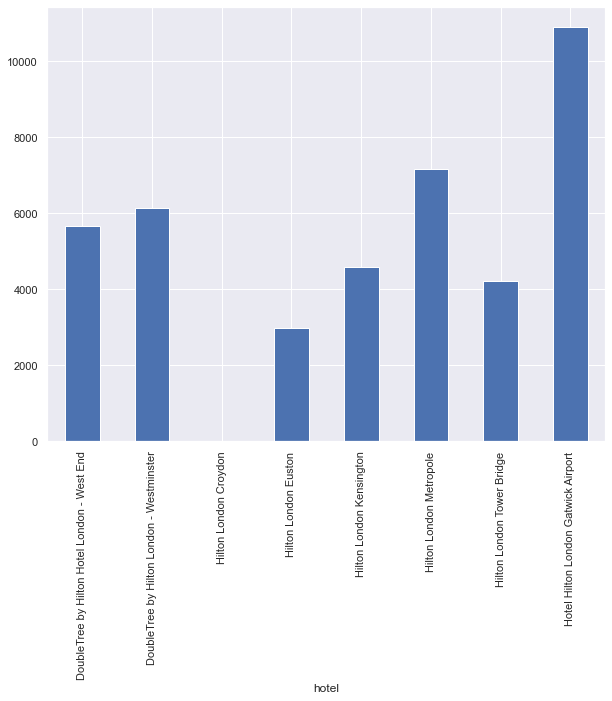

In [43]:
# Look at the distribution of reviews per hotel
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

reviews.groupby('hotel')['review'].count().plot(kind='bar', ax=ax)

In [44]:
# Convert ratings to  a 5 point scale
reviews['rating'] = reviews['rating'].apply(lambda x: int(int(x)/10))

In [45]:
reviews.head(3)

hotel  \
0  Hilton London Tower Bridge   
1  Hilton London Tower Bridge   
2  Hilton London Tower Bridge   

                                              review  \
0  Lovely staff through out the hotel particularl...   
1  Stayed with 9 year old daughter on a whistle s...   
2  Badly managed check-in process. No fresh orang...   

                               title  rating       date  
0  Excellent oasis in troubled times       5 2020-12-01  
1      Lovely staff, great location.       5 2020-08-01  
2                       Catastrophic       1 2020-12-01

<AxesSubplot:>

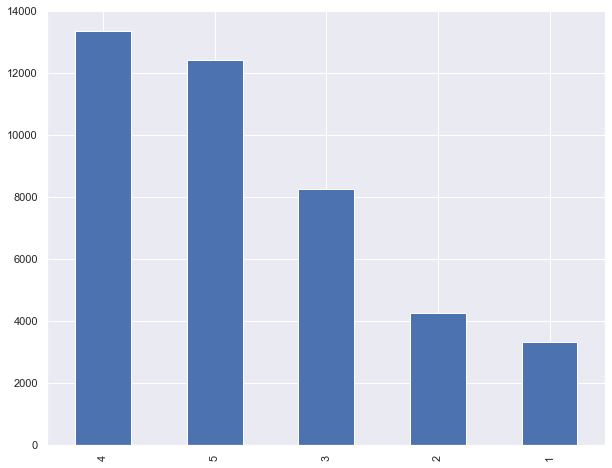

In [46]:
# Look at the distribution of ratings
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

reviews['rating'].value_counts().plot(kind='bar', ax=ax)

In [47]:
# Review distribution percentage
rating_counts = reviews['rating'].value_counts()
total = reviews.shape[0]
percentage = rating_counts / total * 100

pd.concat([rating_counts, percentage], axis=1, keys=['Total', 'Percentage'])

Total  Percentage
4  13358   32.062791
5  12432   29.840142
3   8274   19.859824
2   4260   10.225145
1   3338    8.012097

#### Observation:
* Classes are heavily imbalanced
* Reviews with ratings 1,2 and 3 constitute approx 12% of the entire reviews

<AxesSubplot:xlabel='hotel', ylabel='review'>

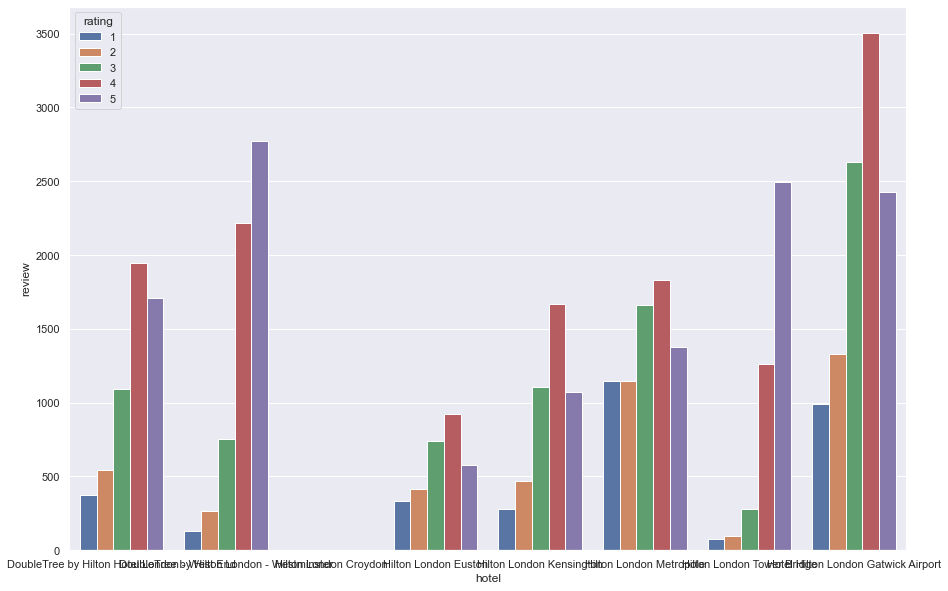

In [48]:
# Look at the distribution of ratings per hotel
hotel_ratings = reviews.groupby(['hotel', 'rating'])['review'].count().reset_index()

fig = plt.figure(figsize=(15, 10))
ax = fig.gca()

sns.barplot(data=hotel_ratings, x='hotel', y='review', hue='rating')

In [49]:
reviews.head(3)

hotel  \
0  Hilton London Tower Bridge   
1  Hilton London Tower Bridge   
2  Hilton London Tower Bridge   

                                              review  \
0  Lovely staff through out the hotel particularl...   
1  Stayed with 9 year old daughter on a whistle s...   
2  Badly managed check-in process. No fresh orang...   

                               title  rating       date  
0  Excellent oasis in troubled times       5 2020-12-01  
1      Lovely staff, great location.       5 2020-08-01  
2                       Catastrophic       1 2020-12-01

In [50]:
# Convert date to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

In [51]:
# Create a month and year column from the datetime
reviews['month'] = reviews['date'].dt.month
reviews['year'] = reviews['date'].dt.year

<AxesSubplot:xlabel='month'>

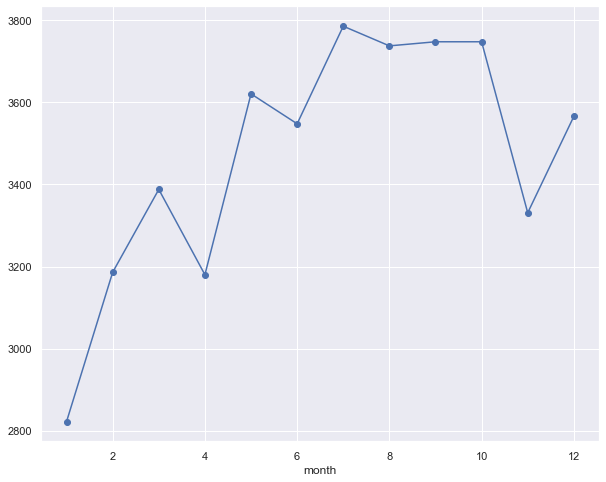

In [52]:
# Group reviews by month
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

reviews.groupby('month')['review'].count().plot(kind='line', marker='o')

In [53]:
reviews.head(3)

hotel  \
0  Hilton London Tower Bridge   
1  Hilton London Tower Bridge   
2  Hilton London Tower Bridge   

                                              review  \
0  Lovely staff through out the hotel particularl...   
1  Stayed with 9 year old daughter on a whistle s...   
2  Badly managed check-in process. No fresh orang...   

                               title  rating       date  month  year  
0  Excellent oasis in troubled times       5 2020-12-01     12  2020  
1      Lovely staff, great location.       5 2020-08-01      8  2020  
2                       Catastrophic       1 2020-12-01     12  2020

#### Observations:
* July to October are the months with the most reviews
* December and February are the months with the least reviews

<AxesSubplot:xlabel='year'>

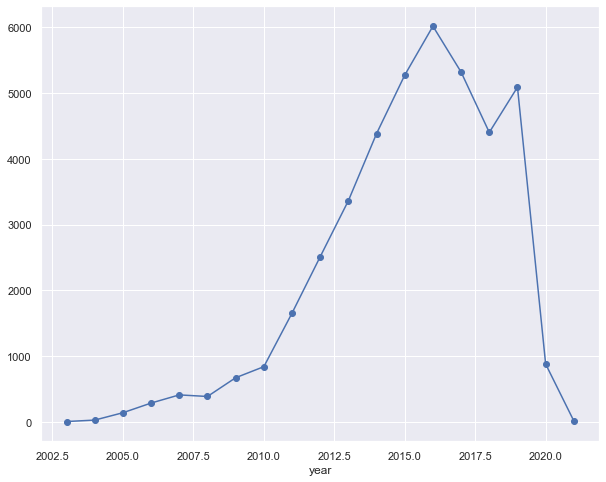

In [54]:
# Group reviews by month
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

reviews.groupby('year')['review'].count().plot(kind='line', marker='o')

#### Observations:
* 2015 to 2019 were the years with most reviews given to the hotels
* There was a drop in the number of reviews is 2020 which could be attributed to the current pandemic and hotel tourism restrictions
* 2021 is still young hence the low number of reviews

In [55]:
reviews.head(2)

hotel  \
0  Hilton London Tower Bridge   
1  Hilton London Tower Bridge   

                                              review  \
0  Lovely staff through out the hotel particularl...   
1  Stayed with 9 year old daughter on a whistle s...   

                               title  rating       date  month  year  
0  Excellent oasis in troubled times       5 2020-12-01     12  2020  
1      Lovely staff, great location.       5 2020-08-01      8  2020

In [56]:
# Get the size of the minority class
minority_class_dist = len(reviews[reviews['rating'] == 2])

In [57]:
minority_class_dist

4260

In [58]:
rating_1_indices = reviews[reviews['rating'] == 1].index
rating_2_indices = reviews[reviews['rating'] == 2].index
rating_3_indices = reviews[reviews['rating'] == 3].index
rating_4_indices = reviews[reviews['rating'] == 4].index
rating_5_indices = reviews[reviews['rating'] == 5].index

In [59]:
#x rating_2_sampled_idx = np.random.choice(rating_2_indices, size=minority_class_dist, replace=False)
rating_3_sampled_idx = np.random.choice(rating_3_indices, size=minority_class_dist, replace=False)
rating_4_sampled_idx = np.random.choice(rating_4_indices, size=minority_class_dist, replace=False)
rating_5_sampled_idx = np.random.choice(rating_5_indices, size=minority_class_dist, replace=False)

In [60]:
print(len(rating_1_indices))
print(len(rating_2_indices))
print(len(rating_3_sampled_idx))
print(len(rating_4_sampled_idx))
print(len(rating_5_sampled_idx))

3338
4260
4260
4260
4260


In [61]:
resample_indices = np.hstack((rating_1_indices, rating_2_indices, rating_3_sampled_idx, rating_4_sampled_idx, rating_5_sampled_idx))

In [62]:
len(resample_indices)

20378

In [63]:
reviews = reviews.loc[resample_indices]

<AxesSubplot:>

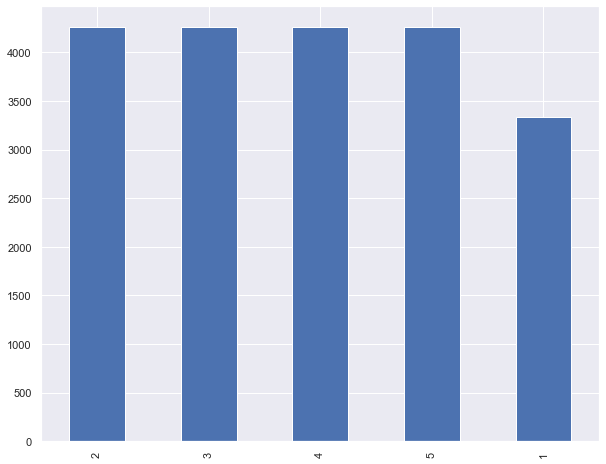

In [64]:
# Look at the distribution of ratings
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()

reviews['rating'].value_counts().plot(kind='bar', ax=ax)

### EDA on Reviews

In [65]:
# Dictionary mapping word contractions to their full words
contractions = { 
    "ain't": "are not","'s":" is","aren't": "are not",
     "can't": "cannot","can't've": "cannot have",
     "'cause": "because","could've": "could have","couldn't": "could not",
     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
     "hasn't": "has not","haven't": "have not","he'd": "he would",
     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
     "it'd": "it would","it'd've": "it would have","it'll": "it will",
     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
     "mayn't": "may not","might've": "might have","mightn't": "might not", 
     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
     "mustn't've": "must not have", "needn't": "need not",
     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
     "she'll": "she will", "she'll've": "she will have","should've": "should have",
     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
     "there'd've": "there would have", "they'd": "they would",
     "they'd've": "they would have","they'll": "they will",
     "they'll've": "they will have", "they're": "they are","they've": "they have",
     "to've": "to have","wasn't": "was not","we'd": "we would",
     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
     "what'll've": "what will have","what're": "what are", "what've": "what have",
     "when've": "when have","where'd": "where did", "where've": "where have",
     "who'll": "who will","who'll've": "who will have","who've": "who have",
     "why've": "why have","will've": "will have","won't": "will not",
     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
     "y'all'd've": "you all would have","y'all're": "you all are",
     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
     "you'll": "you will","you'll've": "you will have", "you're": "you are",
     "you've": "you have"
}

In [66]:
meaningless_words = ['hotel','stay','hilton','location','room','service','airport','staff','london','night','flight','overnight','rooms', 'experience','gatwick','ever','holiday','one', 'stayed','would','breakfast','bed','check','get','us','time','reception','terminal','bar','food','booked','walk','bathroom', 'really','early','could','also','restaurant','morning','even','floor','next','back','day','two', 'got','executive','south','shower','first','long','need','area', 'minutes','lounge','went','much','told','sleep', 'arrived','hotels','work','station','nights','beds', 'quite','bit','go','people','car']

for word in meaningless_words:
    STOPWORDS.append(word)

In [67]:
# Remove punctutation marks, stopwords, emojis, urls, convert to lowercase, expand contractions, hashtags, retweet
def preprocess_review(review):
    res_review = []
    lemmatizer = WordNetLemmatizer()
    
    for word in review.split():
        # Convert to lowercase
        word = word.lower()
        
        # Expand Contractions
        word = contractions.get(word, word)
        
        for w in word.split(" "):    
            # Remove stopwords
            if w not in STOPWORDS:
#                 w = splitter.split(w)
                
                # Remove punctuation
                w = re.sub(r'[^\w\s]', '', str(w))
                
                # Remove numbers
                w = re.sub(r'\d+', '',w)

                # Lemmatize the word
                w = lemmatizer.lemmatize(w, pos='v')

                if w != '':
                    res_review.append(w)
           
    return ' '.join([word for word in res_review])  

In [68]:
# Preprocess the reviews
reviews['review'] = reviews['review'].progress_apply(lambda x: preprocess_review(x))

Progress: 100%|██████████| 20378/20378 [00:31<00:00, 655.01it/s] 


In [69]:
reviews.head(2)

hotel  \
2   Hilton London Tower Bridge   
64  Hilton London Tower Bridge   

                                               review  \
2   badly manage checkin process fresh orange juic...   
64  conference venued recently glance build nice i...   

                              title  rating       date  month  year  
2                      Catastrophic       1 2020-12-01     12  2020  
64  Great decor but average service       1 2006-09-01      9  2006

In [70]:
# Preprocess the review titles
reviews['title'] = reviews['title'].progress_apply(lambda x: preprocess_review(x))

Progress: 100%|██████████| 20378/20378 [00:03<00:00, 6712.84it/s]


In [71]:
reviews.head(2)

hotel  \
2   Hilton London Tower Bridge   
64  Hilton London Tower Bridge   

                                               review                title  \
2   badly manage checkin process fresh orange juic...         catastrophic   
64  conference venued recently glance build nice i...  great decor average   

    rating       date  month  year  
2        1 2020-12-01     12  2020  
64       1 2006-09-01      9  2006

In [72]:
review_tokens = [token for review in reviews['review'].values for token in review.split()]
fdist = FreqDist(review_tokens)

<AxesSubplot:>

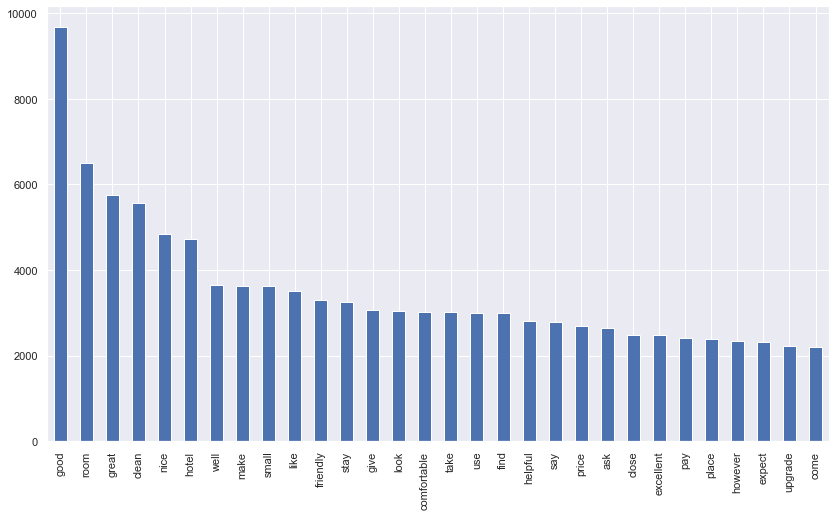

In [73]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca()

pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)

In [74]:
title_tokens = [token for title in reviews['title'].values for token in title.split()]
fdist_title = FreqDist(title_tokens)

<AxesSubplot:>

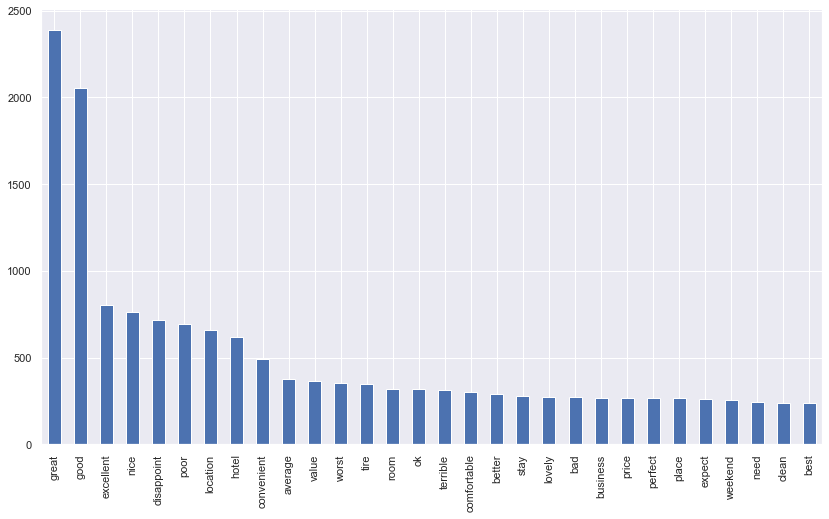

In [75]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca()

pd.Series(dict(fdist_title.most_common(30))).plot(kind='bar', ax=ax)

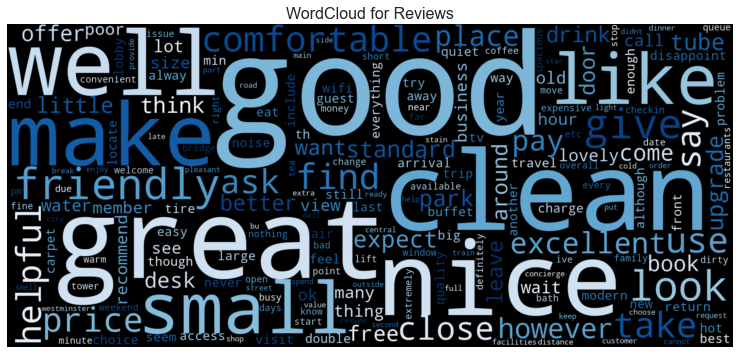

In [76]:
# Word cloud of words in the reviews
plt.subplots(figsize=(13,13))
text = reviews['review']
wc = WordCloud(
  stopwords=STOPWORDS,
  background_color='black',
  colormap='Blues',
  collocations=False,
  width=1800,
  height=800
)
wc.generate(' '.join(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud for Reviews",fontsize=16)
plt.show()

In [77]:
def display_cloud(label, df, col):
    plt.subplots(figsize=(13,13))
    text = df[df['rating']==label][col].tolist()
    wc = WordCloud(
      stopwords=STOPWORDS,
      background_color='black',
      colormap='Blues',
      collocations=False,
      width=1800,
      height=800,
    )
    wc.generate(' '.join(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.title("WordCloud for Rating " + str(label), fontsize=24)
    plt.show()

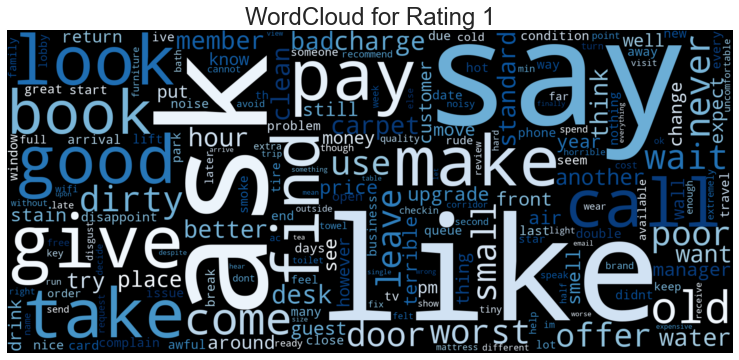

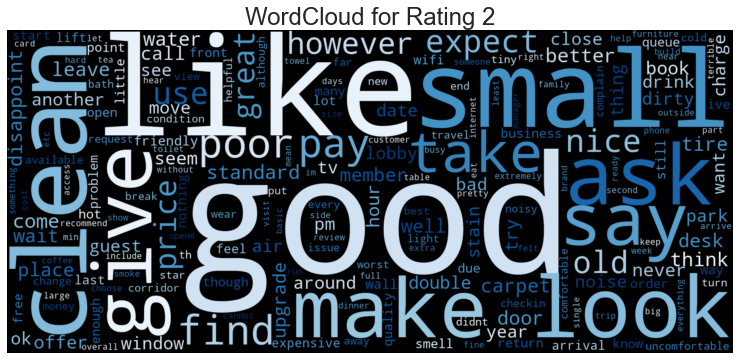

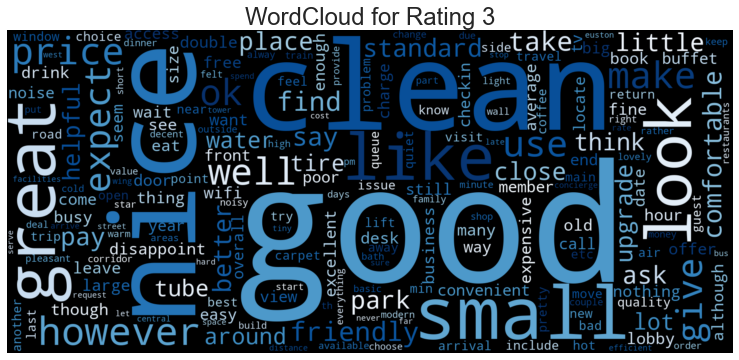

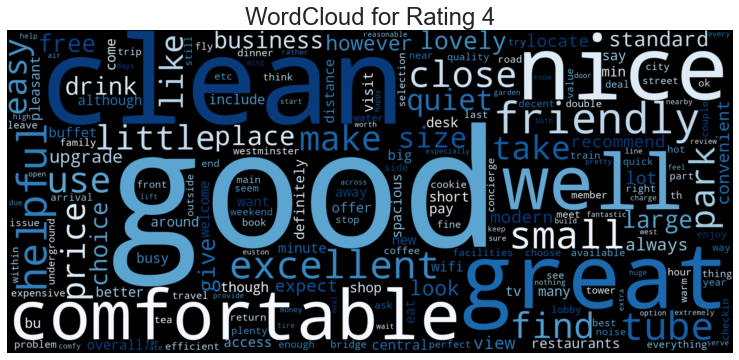

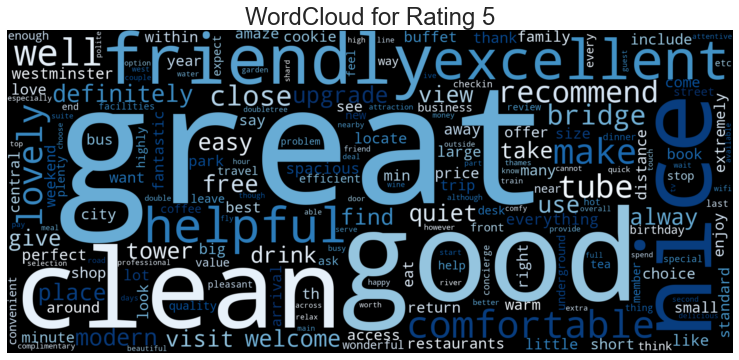

In [78]:
for rating in reviews['rating'].unique():
    display_cloud(rating, reviews, 'review')

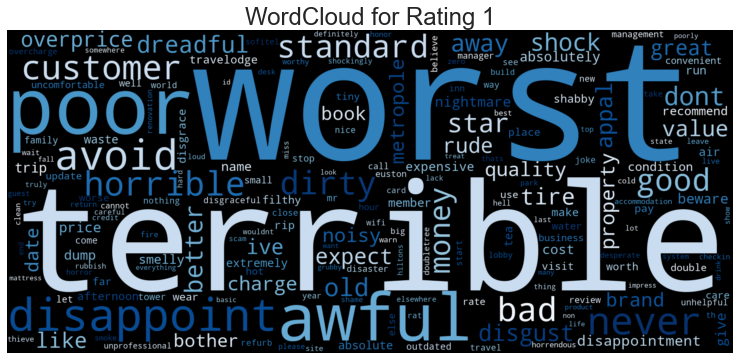

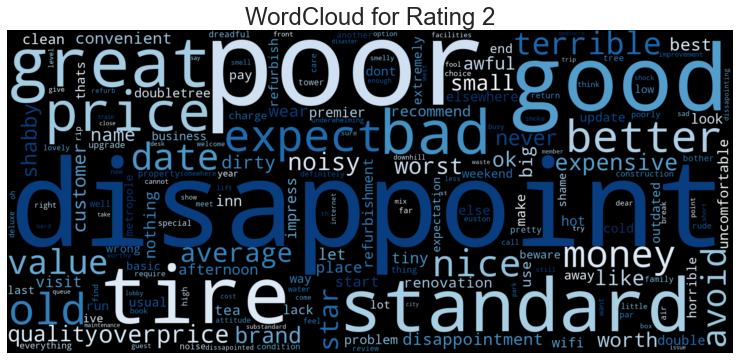

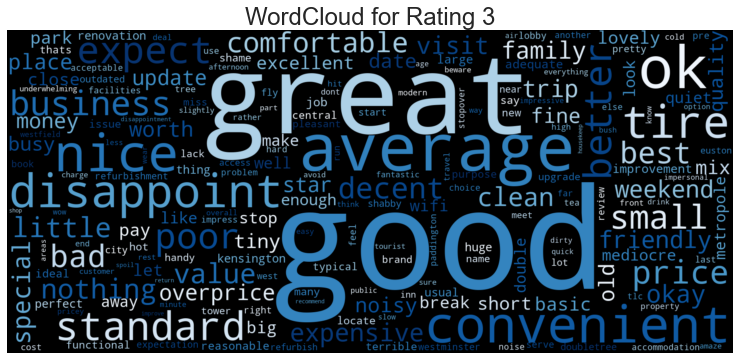

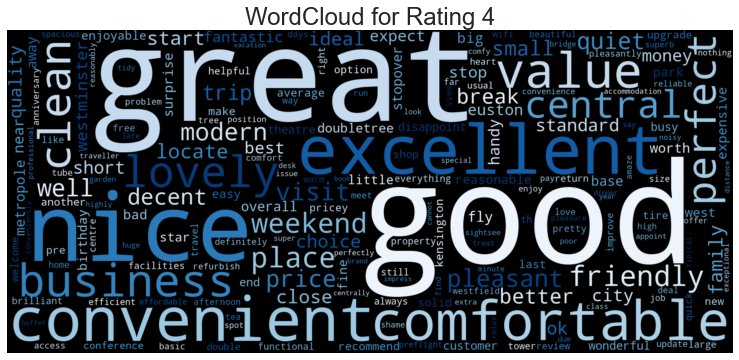

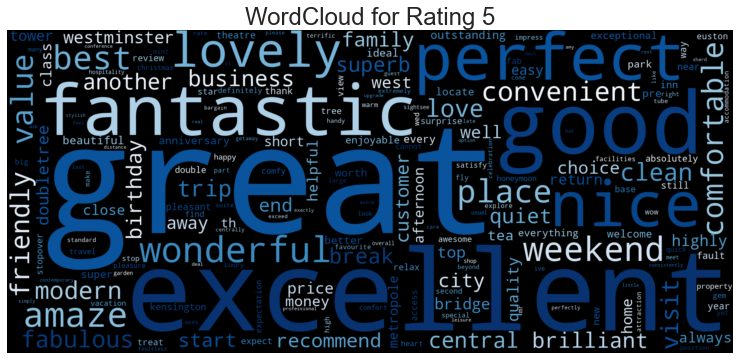

In [79]:
for rating in reviews['rating'].unique():
    display_cloud(rating, reviews, 'title')

In [80]:
from nltk.util import ngrams

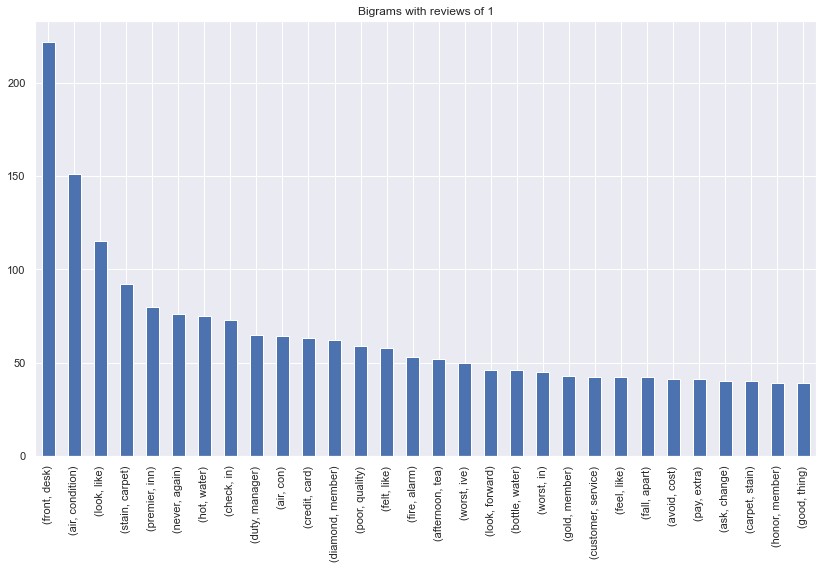

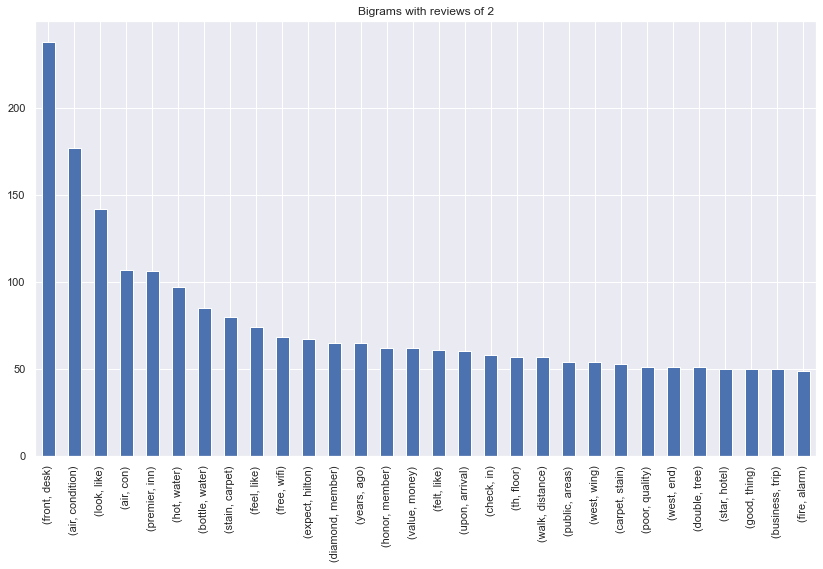

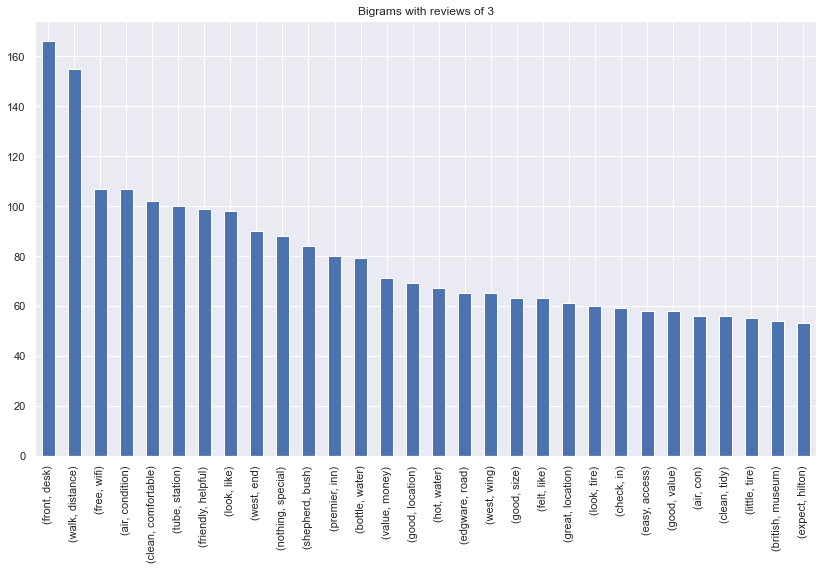

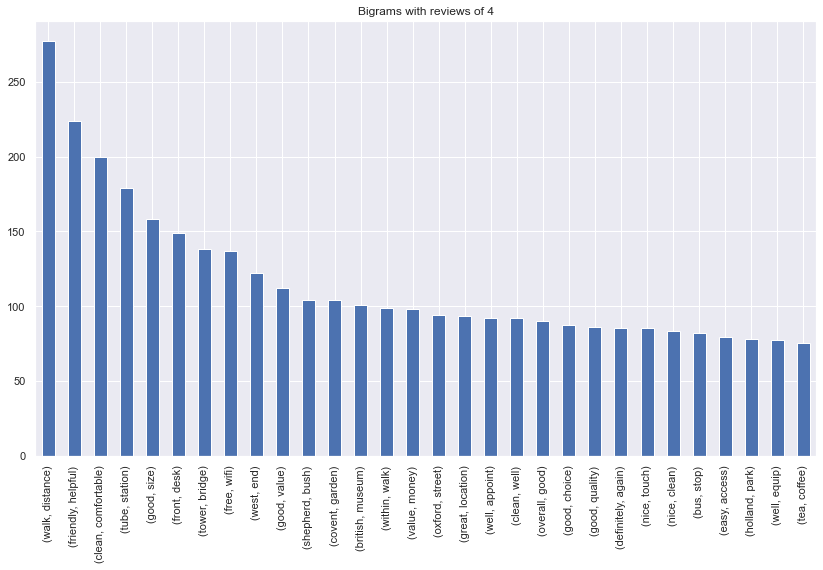

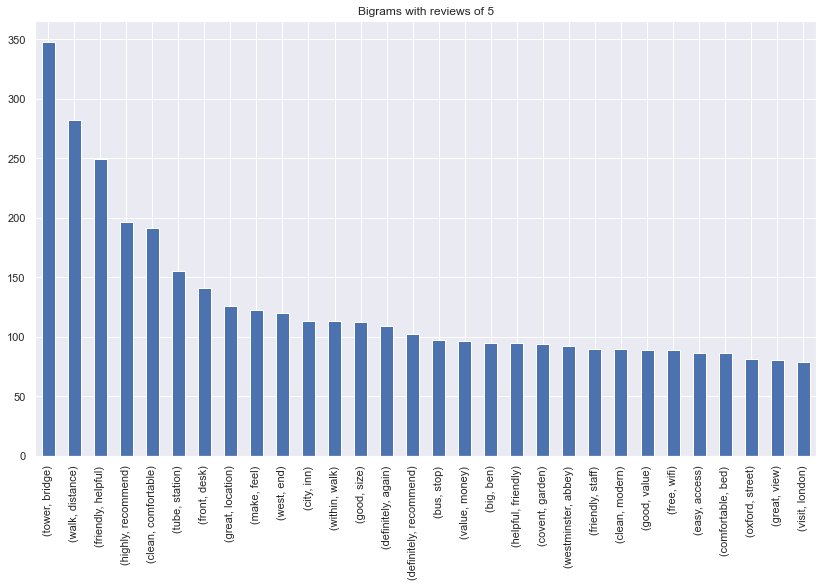

In [81]:
for rating in reviews['rating'].unique():
    review_tokens = [token for review in reviews[reviews['rating'] == rating]['review'] for token in review.split()]
    token_grams = ngrams(review_tokens, 2)
    fdist = FreqDist(token_grams)
    
    fig = plt.figure(figsize=(14,8))
    ax = fig.gca()

    pd.Series(dict(fdist.most_common(30))).plot(kind='bar', ax=ax)
    plt.title('Bigrams with reviews of ' + str(rating))

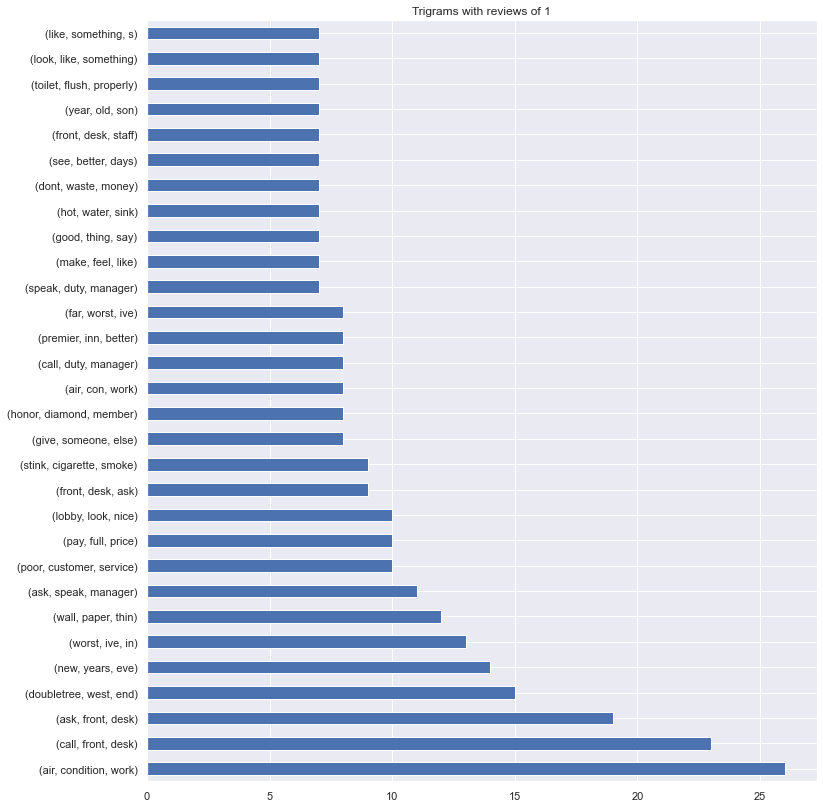

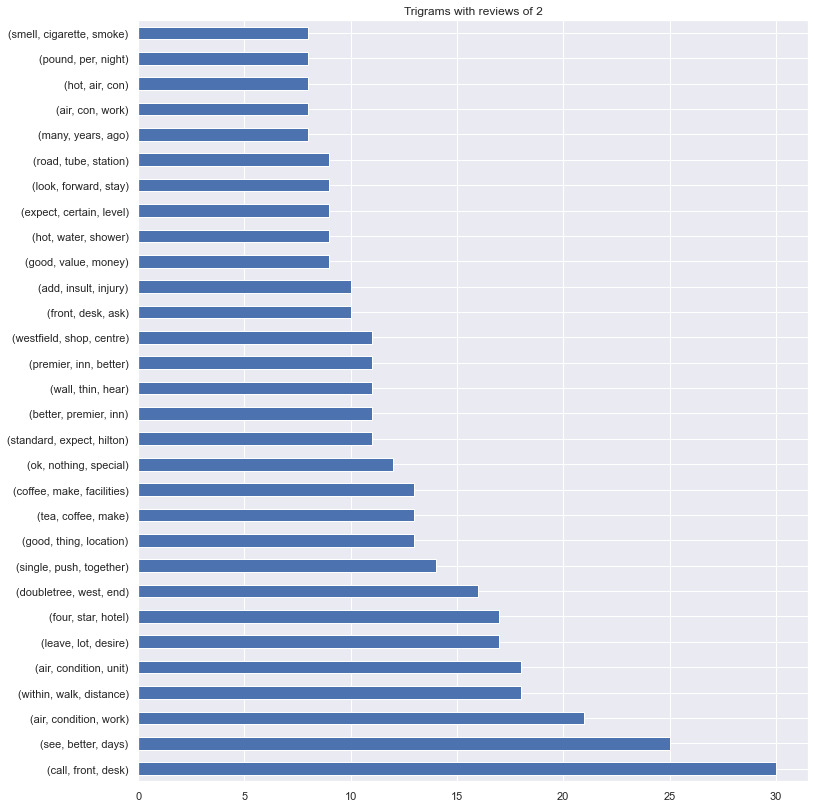

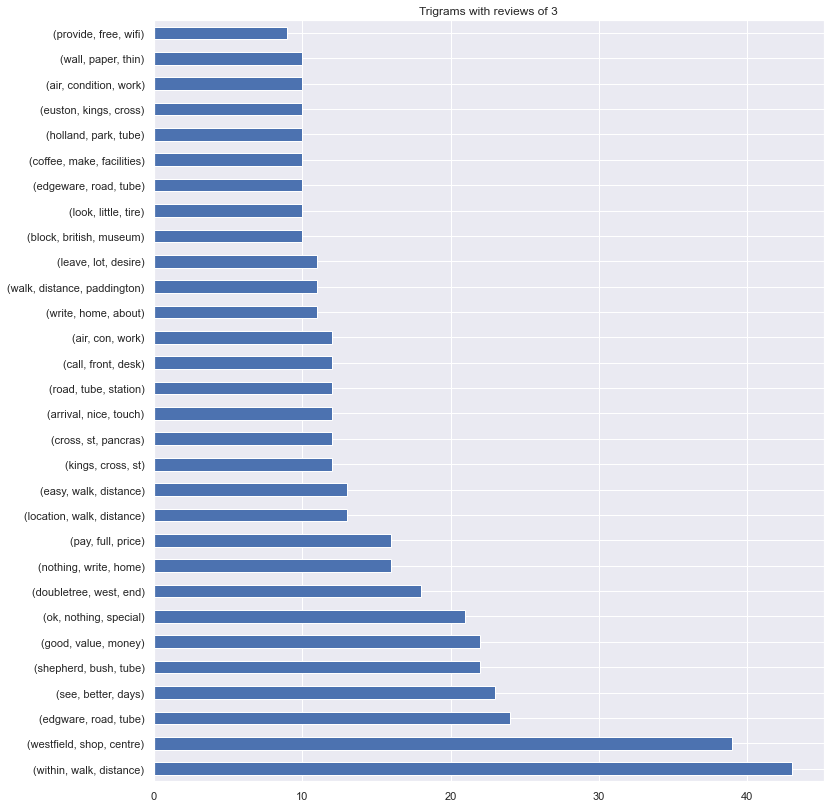

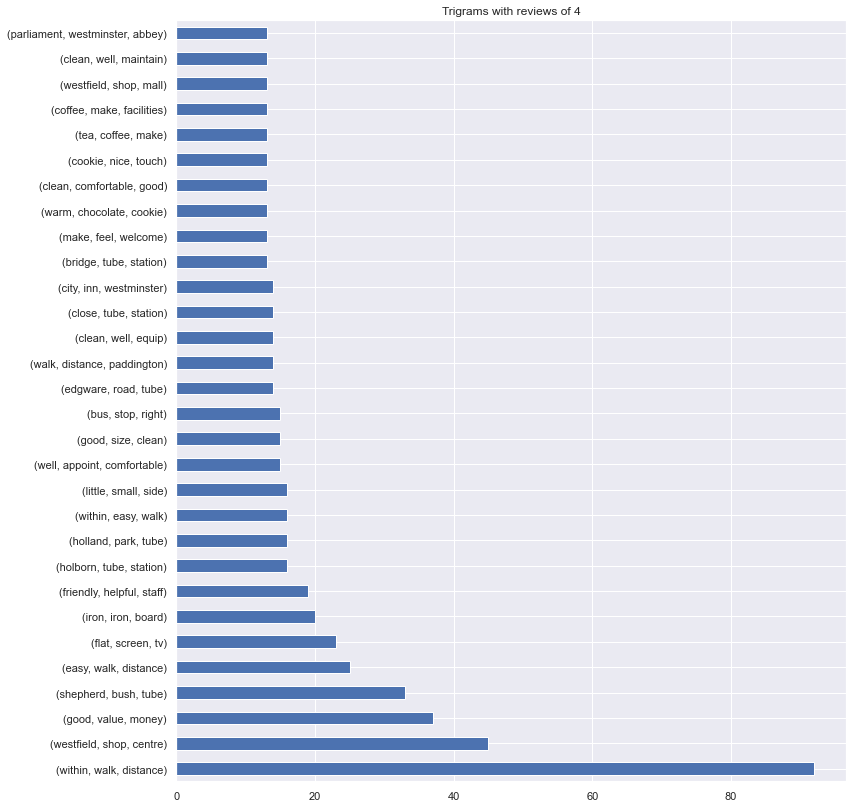

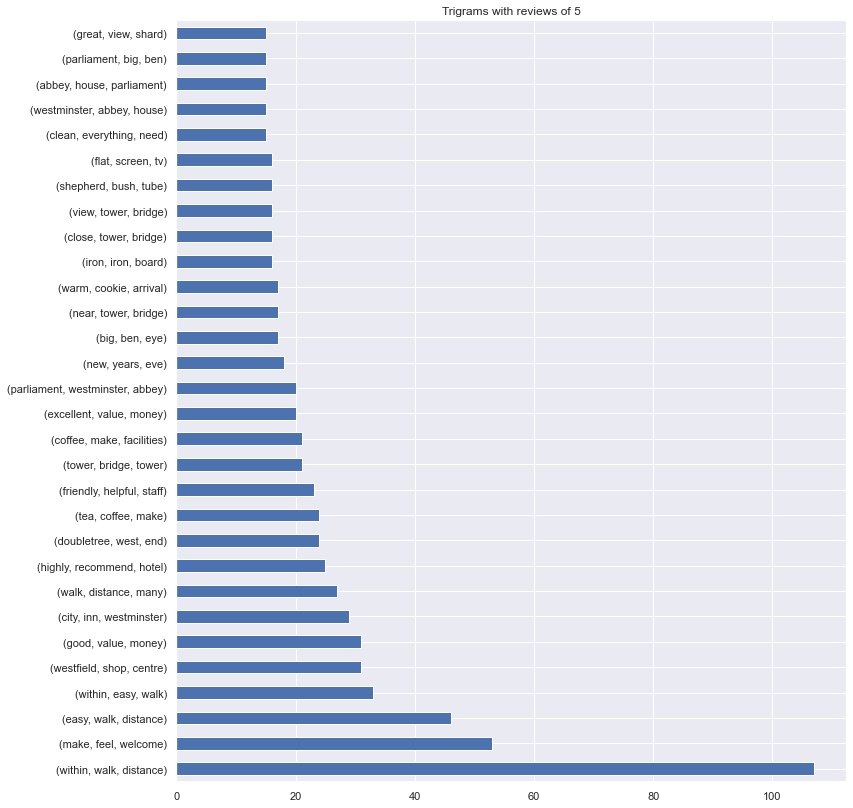

In [82]:
for rating in reviews['rating'].unique():
    review_tokens = [token for review in reviews[reviews['rating'] == rating]['review'] for token in review.split()]
    token_grams = ngrams(review_tokens, 3)
    fdist = FreqDist(token_grams)
    
    fig = plt.figure(figsize=(12,14))
    ax = fig.gca()

    pd.Series(dict(fdist.most_common(30))).plot(kind='barh', ax=ax)
    plt.title('Trigrams with reviews of ' + str(rating))

In [83]:
# Save mapped tweets to file
reviews.to_csv("Preprocessed_Reviews.csv", index=False)